In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#importing data
data = pd.read_csv("iris.data",names=['x1','x2','x3','x4','class'])

map = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

data.replace(map,inplace=True)

X= np.array(data.drop('class',axis=1))
Y= np.array(data['class'])

In [3]:
class KMeans(object):

    def __init__(self,k):
        # Set random seed so that same output is generated
        np.random.seed(45)
        #Defining  maximum number of iterations
        self.max_itterations = 100
        self.K=k

    #function to calculate euclidean distance
    def distance(self, x, y): 
        return np.sqrt(((x - y[:, np.newaxis])**2).sum(axis=2))
    
    def fit(self,X):
        K=self.K
        # Initialize centroids randomly
        centroids = X[np.random.choice(X.shape[0], K, replace=False), :]

        # loop
        for i in range(self.max_itterations):
            # Computing the distances from each data point to each centroid
            distances = self.distance(X,centroids)
            
            # Assign each data point to the closest centroid
            labels = np.argmin(distances, axis=0)
            
            # Update the centroids as the mean of the assigned data points
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
            
            # Check if there is change in centroids
            if np.allclose(new_centroids, centroids):
                break
            
            centroids = new_centroids
        self.centroids=centroids
        return centroids,labels

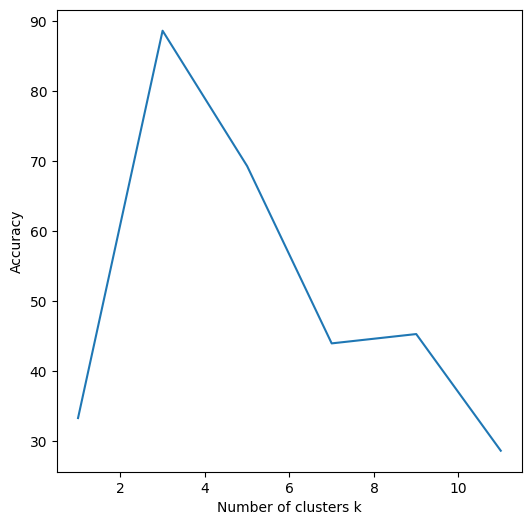

In [4]:
#defining function to calculate accuracy of model
def accuracy(labels,target):
    return np.mean(labels == target) * 100

#determining value for k
k_list = list(range(1, 12,2))
acc_list = []
for i in k_list:
    knn=KMeans(i)
    centroids,labels=knn.fit(X)
    acc_list.append(accuracy(labels,Y))

#ploting graph for analysis
plt.figure(figsize=(6, 6))
plt.plot(k_list, acc_list)

plt.xlabel('Number of clusters k')
plt.ylabel('Accuracy')
plt.show()

Accuracy for Kmeans for k=3 : 88.67%


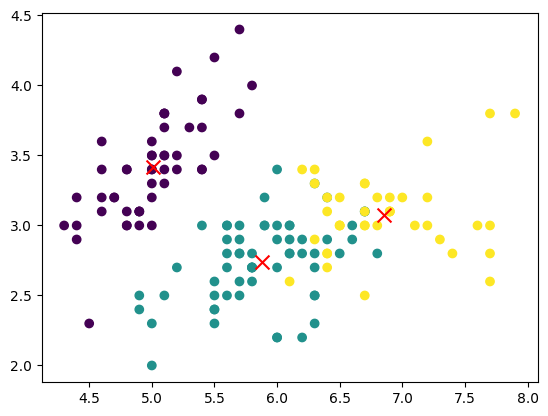

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9667 - loss: 0.1324
Test loss: 0.1324, Test accuracy: 0.9667 For logistic regression model using tensorflow 


In [7]:
# Define the number of clusters
K = 3
max_iters = 100
knn=KMeans(K)
centroids,labels=knn.fit(X)
print(f"Accuracy for Kmeans for k=3 : {accuracy(labels,Y):.2f}%")

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.show()



#traning a logistic regression model using tensorflow
# Split data ito training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
# Normalize input data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, input_shape=(4,),activation='softmax')
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0 )

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {acc:.4f} For logistic regression model using tensorflow ")